# MDS5023 Predictive Churn Analysis

## 1. Data Collection and Selection

### 1.1 Import Libraries/Packages

In [1]:
# Pip install commands if error occurs when importing the libraries

#!pip install imblearn
#!pip install -v scikit-learn

In [2]:
# Import relavant libraries/packages
import pandas as pd # Used for importing/loading dataset & data manipulation and analysis
import numpy as np # Used for working with arrays
import matplotlib.pyplot as plt # Used for data visualizations (subplots)
import seaborn as sns; sns.set() # Used for data visualizations (pairplots, countplots, boxplot, heatmap)

from imblearn.under_sampling import RandomUnderSampler # Deal with imbalanced data
from sklearn.preprocessing import LabelEncoder # Label encoding
from sklearn.preprocessing import StandardScaler # Feature standardisation 
from sklearn.model_selection import train_test_split # Splitting training and testing set
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Model performance & evaluation
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score # Model performance & evaluation
from sklearn.metrics import confusion_matrix, classification_report # Model performance & evaluation
from sklearn.linear_model import LogisticRegression # Logistic Regression algorirthm 

%matplotlib inline
# Sets the backend of matplotlib to the 'inline' backend. 
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.

### 1.2 Import/Load Dataset

In [3]:
# Import/Load dataset & Remove customerID variable
df = pd.read_csv('Telco Customer Churn Dataset.csv', index_col='customerID')

df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


<ul>
    <li>Import the data file into Python JN using the "Pandas" read_csv function.</li>
    <li>Use CustomerID as the index column, which removes the variable from the dataframe</li>
</ul>

## 2. Data Scubbing & Preparation

### 2.1 Dataset Infographics

In [4]:
# Identify feature data types and data set shape. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

<ul>
    <li>It can be observed that the dataset consists of 7043 rows of observation, 20 features/variables (after removing CustomerID), and object,int,float datatypes</li>
    <li>Notice TotalCharges is encoded as "object" which is a "string" datatype for number only observations, when it should be numerically encoded as "float64" datatype.</li>
</ul>

### 2.2 Remove Whitespaces & Missing/Null values (Data Imputation)

In [5]:
# Identify number of missing (null) values in the dataset.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Replace any whitespace values with NaN
df = df.replace(r'\s+$', np.nan, regex=True)

# Replace any wild characters (symbols) with NaN
wild_chars = ['?', '-', '.', '_', '*']
for i in wild_chars:
    df[df == i] = np.nan

# Print number of null values 
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Notice after replacing and removing whitespaces, there are now 11 null/missing values for TotalCharges.

C:\Users\msi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

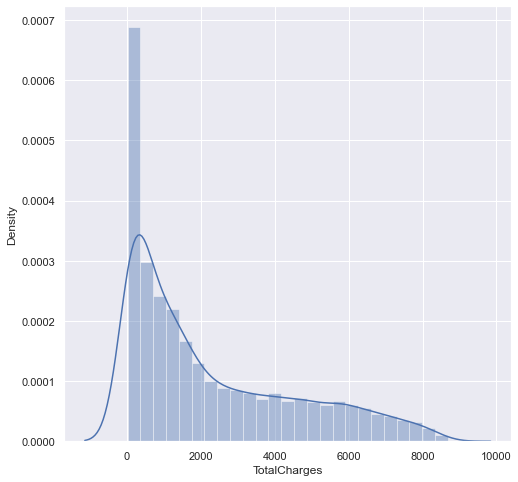

In [7]:
# Distribution plot
plt.figure(figsize=(8, 8))
sns.distplot(df.TotalCharges)

A distribution plot of the feature is plotted using the “seaborn” library package to determine which type of imputation; mean, median, or mode, to be performed. Looking at the results, the feature is skewed, in such cases, it is not recommended to use the mean for replacing the missing values. 

In [8]:
# Impute the missing values using mode
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mode()[0])

# Print number of null values 
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode values for replacing the missing values.

### 2.3 Feature Conversion/Cleansing (Data Manipulation)

In [9]:
# Shows number of unique observations per column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Aside from the 'TotalCharges' feature, displaying the data values of each feature will show is there a need to further consilidate the features and/or values.

In [10]:
# Display unique values for each feature.
def unique_values():
    for col in df:
        print(col)
        print(df[col].unique(), '\n')

unique_values()

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  

From here, it is observed that there are no outliers; however, there are several features that can be converted and replaced. These features include: 
    <ul>
    <li>TotalCharges</li>
    <li>SeniorCitizen</li>
    <li>OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies</li>
    <li>MultipleLines</li>
    <li>Contract</li>
    </ul>

In [11]:
# Convert TotalCharges from object/string to float. 
df.TotalCharges = df.TotalCharges.astype(float)

# Replace 0 and 1 with "No" and "Yes" in SeniorCitizen feature
df.SeniorCitizen = df.SeniorCitizen.replace({1:'Yes', 0:'No'})

# Replace "No internet service" with "No"
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for x in internet_cols:
    df[x] = df[x].replace({'No internet service' : 'No'})

# Replace "No phone service" with "No"
df.MultipleLines = df.MultipleLines.replace({'No phone service' : 'No'})

# Contract feature changes
df.Contract = df.Contract.replace({
    'Month-to-month' : 'Monthly',
    'One year' : "Annual",
    'Two year' : 'Biannual'
})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Annual,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,Annual,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,Yes


<ul>
    <li>Converted the TotalCharges data type from object to float</li>
    <li>Replaced the 0's and 1's in the SeniorCitizen column with "No" and "Yes", respectively, to keep the binary feature               values consistent for one-hot encoding and visualization labeling</li>
    <li>For the features relating to Services, replaced the "No internet service" value to "No" to eliminate redundancy</li>
    <li>Replaced the "No phone service" value in the MultipleLines feature with "No" to also eliminate redunancy</li>
    <li>For the Contract feature, replaced the following for wording simplicity:
            "Month-to-month" with "Monthly", 
            "One year" with "Annual", 
            "Two year" with "Biannual".</li>
</ul>

In [12]:
unique_values()

gender
['Female' 'Male'] 

SeniorCitizen
['No' 'Yes'] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes'] 

OnlineBackup
['Yes' 'No'] 

DeviceProtection
['No' 'Yes'] 

TechSupport
['No' 'Yes'] 

StreamingTV
['No' 'Yes'] 

StreamingMovies
['No' 'Yes'] 

Contract
['Monthly' 'Annual' 'Biannual'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 

Churn
['No' 'Yes'] 



Above are the new data values for each feature after data scrubbing and preparation in the data frame.

In [13]:
# Export cleaned dataframe to csv file
df.to_csv('CustomerChurn_Cleaned.csv')

The cleaned customer churn data frame is stored as a csv file so that it may be used for further exploratory data analysis and model tuning.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Distribution of Churn

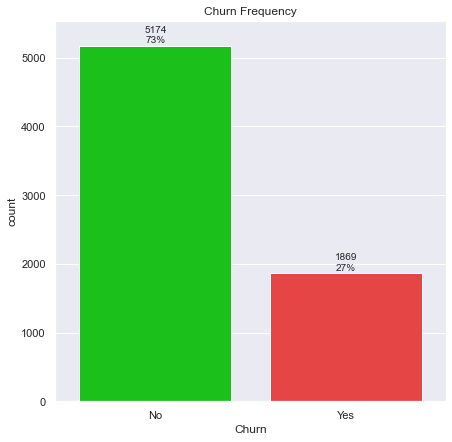

In [14]:
# Define colors
lightgreen = '#00db00'
red = '#ff2b2b'

# Instantiate figure to render plot on
plt.figure(figsize=(7, 7));

# Draw countplot of Churn frequency
ax_vc = sns.countplot(x='Churn', palette=[lightgreen, red], data=df);

# Display percentages above each bar so that the sum per value equals 100%
bars = ax_vc.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax_vc.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0f}\n{1:.0%}'.format(height_l, height_l/total), ha="center")
    ax_vc.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0f}\n{1:.0%}'.format(height_r, height_r/total), ha="center")
plt.margins(0.07)
# Display title
plt.title('Churn Frequency');

plt.show()

<ul>
    <li>The churn rate (target variable) in the data sample is imbalanced.</li>
    <li>During model building, rescaling the weights of the classes and tune parameters that accomodate for the class imbalance         is required to optimize performance.</li>
    <li>Also, using metrics that are less sensitive to class imbalance will be used to evaluate model performance. For instance         recall (following project objective)</li>
</ul>

### 3.2 Distribution of Numerical Features  

In [15]:
# Shows descriptive stats of numeric features
# It also check for any outliers 
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.765853
std,24.559481,30.090047,2266.762876
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


At first glance, everything looks ok with the table of numerical features. 

No outliers in MonthlyCharges nor TotalCharges are spotted.

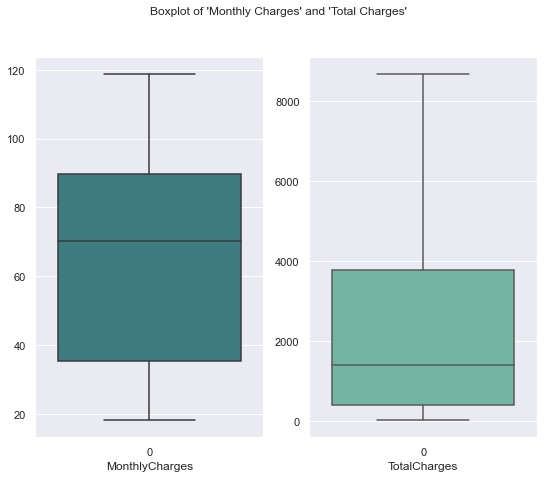

In [16]:
# draw a boxplot to check for outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 7))
fig.suptitle("Boxplot of 'Monthly Charges' and 'Total Charges'")

sns.boxplot(data=df['TotalCharges'], orient="v", palette="Set2")
ax[1].set_xlabel("TotalCharges")

sns.boxplot(data=df['MonthlyCharges'], orient='v', palette="crest", ax=ax[0])
ax[0].set_xlabel("MonthlyCharges")



plt.tight_layout;
plt.show()

Boxplots of both MonthlyCharges and TotalCharges features showed no outliers respectively.

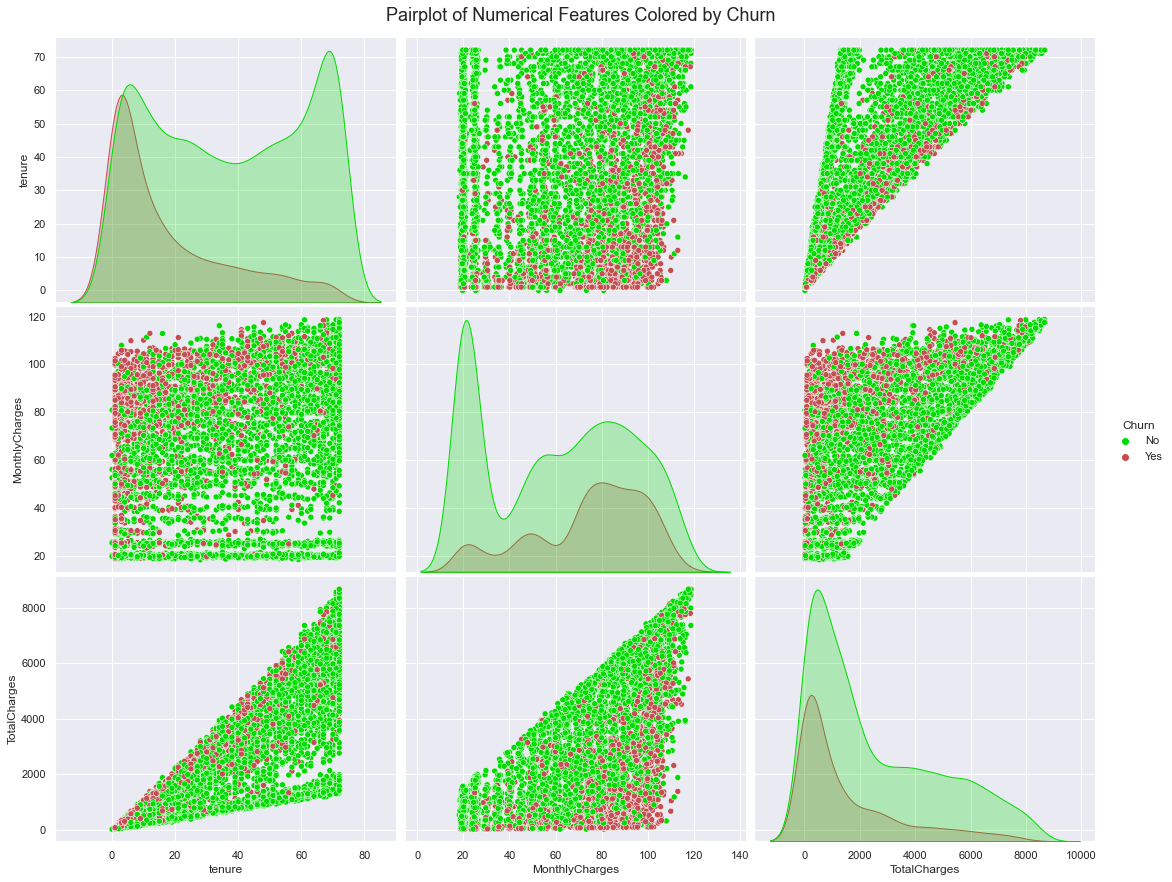

In [17]:
# Plot pairwise relationships between numerical features colored by Churn
g = sns.pairplot(df, hue='Churn', palette=[lightgreen, 'r'], height=4, aspect=1.3);

# Display parent title for figures
g.fig.suptitle('Pairplot of Numerical Features Colored by Churn', y=1.02, fontsize=18);

# Display plot
plt.show()

abc

### 3.3 Churn Rate by Categorical Features 

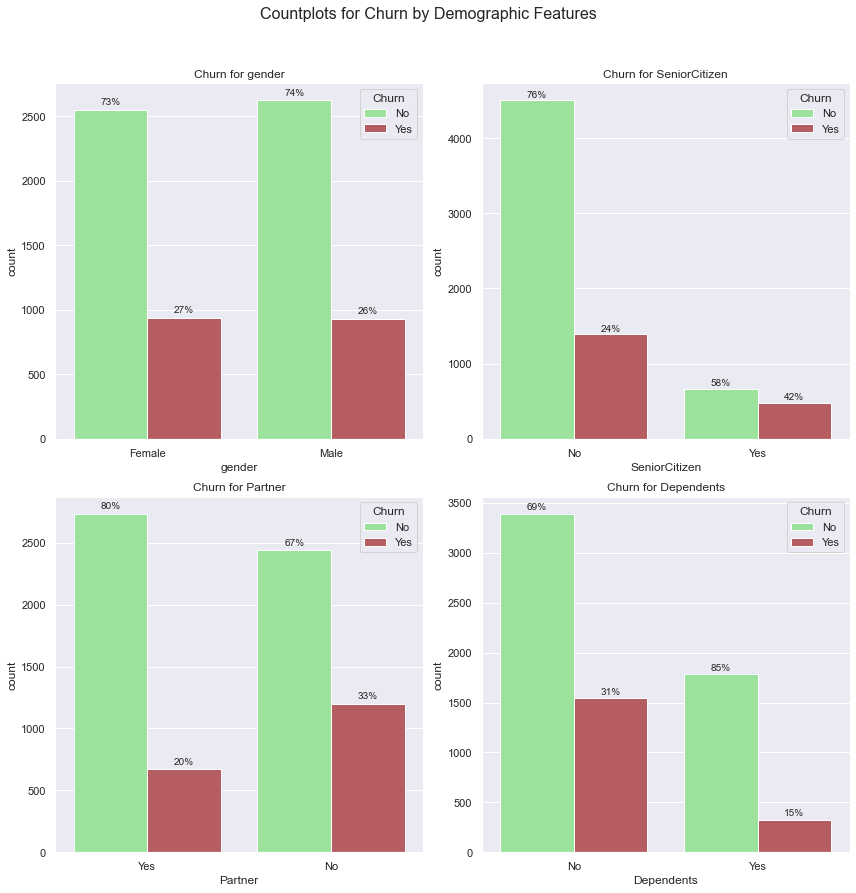

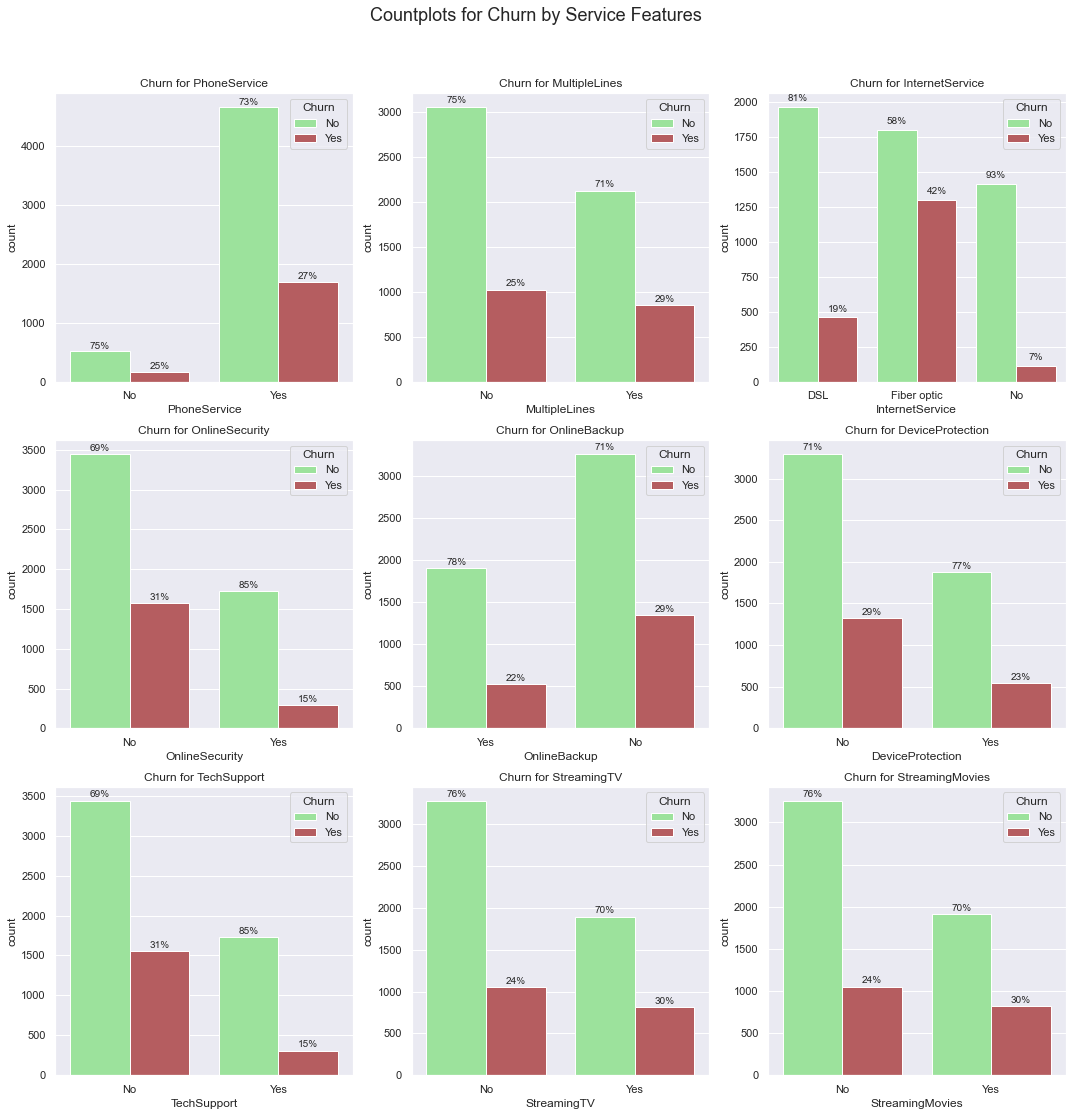

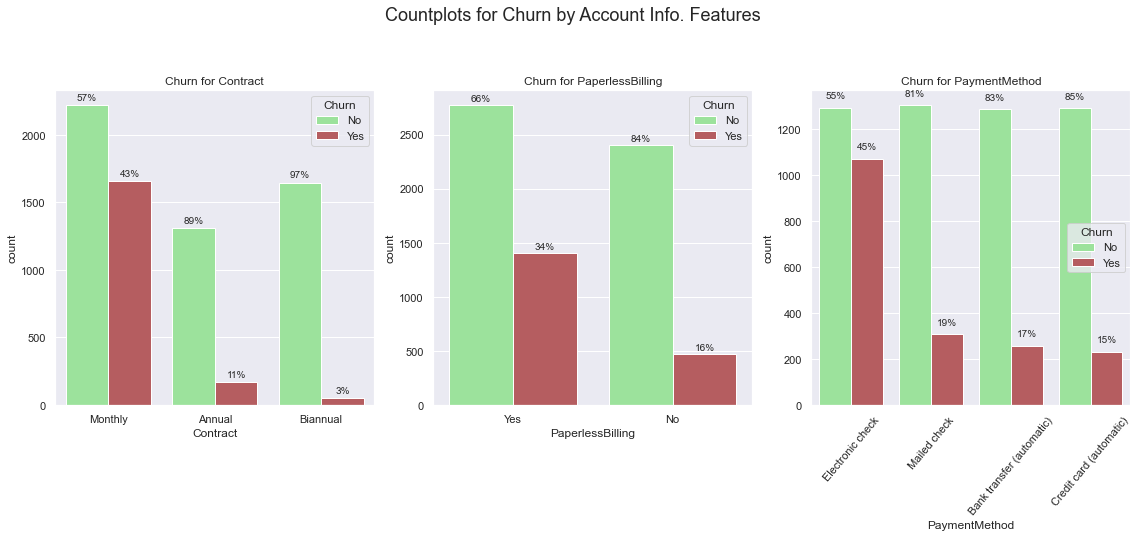

In [18]:
# Categorical demographic features
demo_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Instantiate figure to render plots on
fig8 = plt.figure(figsize=(12, 12))

# Figure title
fig8.suptitle('Countplots for Churn by Demographic Features', y=1.03, fontsize=16);
    
# Loop through demographic features and draw plots
for col, i in zip(demo_cols, range(1, len(demo_cols) + 1)):
    plt.subplot(2, 2, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);

    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

# Categorical service features 
serv_cols = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Instantiate figure to render plots on
fig9 = plt.figure(figsize=(15, 15))

# Figure title
fig9.suptitle('Countplots for Churn by Service Features', y=1.03, fontsize=18);
    
# Loop through service features and draw plots
for col, i in zip(serv_cols, range(1, len(serv_cols) + 1)):
    plt.subplot(3, 3, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);
    
    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

# Categorical account info features
acct_cols = [
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

# Instantiate figure to render plots on
fig10 = plt.figure(figsize=(16, 7))

# Figure title
fig10.suptitle('Countplots for Churn by Account Info. Features', y=1.06, fontsize=18);
    
# Loop through account info features and draw plots
for col, i in zip(acct_cols, range(1, len(acct_cols) + 1)):
    plt.subplot(1, 3, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);
    
    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    if col == 'PaymentMethod':
        plt.xticks(rotation=50);
        plt.legend(['No', 'Yes'], loc='center right', title='Churn');
        
    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

abc

### 3.4 One-Hot Encoding & Creating Dumming Features

In [19]:
# list of binary variables
bin_var = [col for col in df.columns if len(df[col].unique()) == 2]

# list of categorical variables
cat_var = [col for col in df.select_dtypes(['object']).columns.tolist() if col not in bin_var]

# apply Label Encoding for binaries
le = LabelEncoder()
for col in bin_var:
  df[col] = le.fit_transform(df[col])

# apply get_dummies for categorical
df_encoded = pd.get_dummies(df, columns=cat_var)

df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Annual,Contract_Biannual,Contract_Monthly,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
5575-GNVDE,1,0,0,0,34,1,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3668-QPYBK,1,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
7795-CFOCW,1,0,0,0,45,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,0
9237-HQITU,0,0,0,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


abc

In [20]:
# Display unique values for each feature.
def unique_values2():
    for col in df_encoded:
        print(col)
        print(df_encoded[col].unique(), '\n')

unique_values2()

gender
[0 1] 

SeniorCitizen
[0 1] 

Partner
[1 0] 

Dependents
[0 1] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
[0 1] 

MultipleLines
[0 1] 

OnlineSecurity
[0 1] 

OnlineBackup
[1 0] 

DeviceProtection
[0 1] 

TechSupport
[0 1] 

StreamingTV
[0 1] 

StreamingMovies
[0 1] 

PaperlessBilling
[1 0] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 

Churn
[0 1] 

InternetService_DSL
[1 0] 

InternetService_Fiber optic
[0 1] 

InternetService_No
[0 1] 

Contract_Annual
[0 1] 

Contract_Biannual
[0 1] 

Contract_Monthly
[1 0] 

PaymentMethod_Bank transfer (automatic)
[0 1] 

PaymentMethod_Credit card (automatic)
[0 1] 

PaymentMethod_Electronic check
[1 0] 

PaymentMethod_Mailed check
[0 1] 



abc

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int32  
 1   SeniorCitizen                            7043 non-null   int32  
 2   Partner                                  7043 non-null   int32  
 3   Dependents                               7043 non-null   int32  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int32  
 6   MultipleLines                            7043 non-null   int32  
 7   OnlineSecurity                           7043 non-null   int32  
 8   OnlineBackup                             7043 non-null   int32  
 9   DeviceProtection                         7043 non-null   int32  
 10  TechSupport                           

abc

### 3.5 Heatmap of Correlation Coefficients 

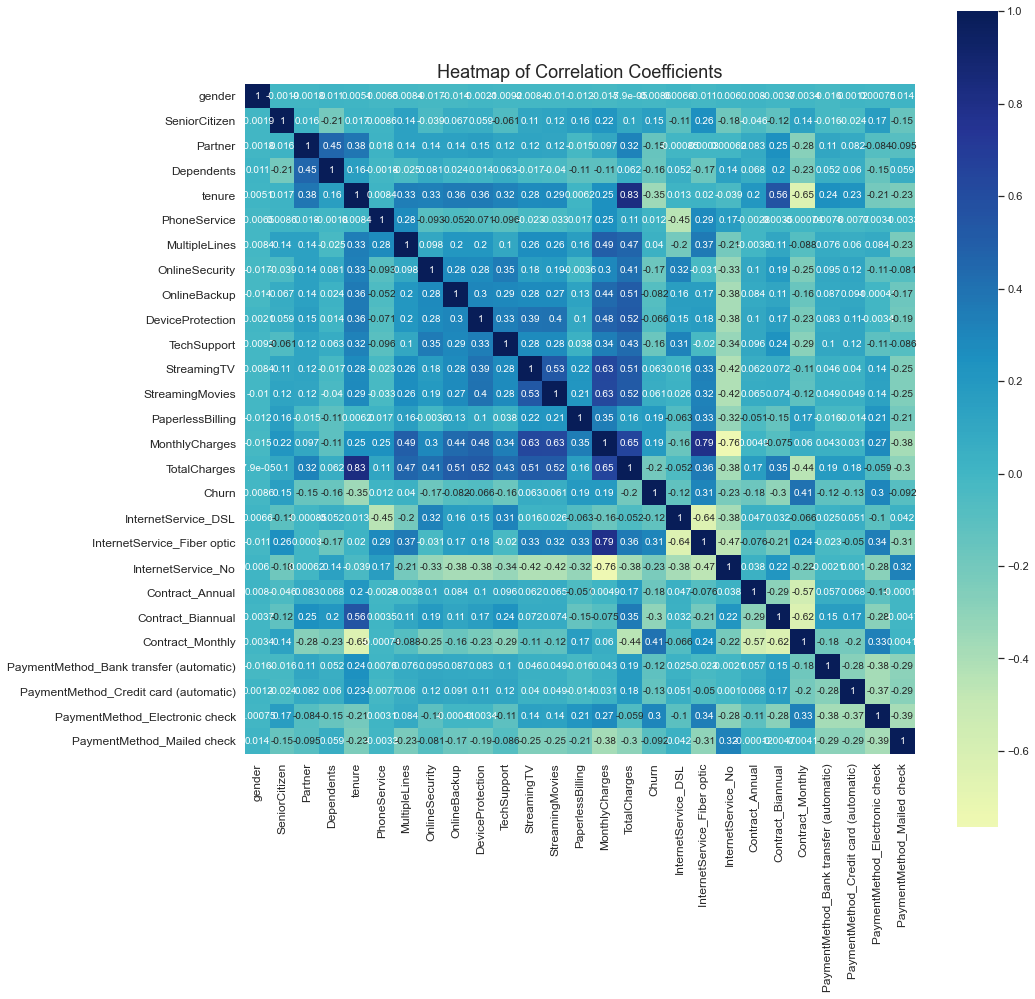

In [22]:
# Instantiate a mask for the weak correlations
weak_corr = ((0.5 > df_encoded.corr()) & (df_encoded.corr() > -0.50))

# Instantiate figure to render subsequent plot on
plt.figure(figsize=(15, 15))

# Draw masked heatmap
sns.heatmap(df_encoded.corr(), 
            xticklabels=df_encoded.corr().columns, 
            yticklabels=df_encoded.corr().columns,
            center=0,
            cmap="YlGnBu",
            square=True,
            annot=True,
#             mask=weak_corr,
            cbar=True)

# Set x and y tick (feature name) font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Heatmap of Correlation Coefficients', fontsize=18)

# Display plot
plt.show()

abc

In [23]:
# Export cleaned and encoded dataframe to csv file
df_encoded.to_csv('CustomerChurn_Cleaned&Encoded).csv')

The cleaned and encoded customer churn data frame is stored as a csv file so that it may be used for further exploratory data analysis and model tuning.

## 4. Data Modeling (Predictive Modeling) & Visualization 

### 4.1 Split Train & Test Sets 

In [24]:
# Feature matrix
X = df_encoded.drop(['Churn', 'TotalCharges', 'gender'], axis=1)

# Target vector
y = df_encoded['Churn']

# Split into 3 different Train and Test sets
X_train_8020, X_test_8020, y_train_8020, y_test_8020 = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train_7030, X_test_7030, y_train_7030, y_test_7030 = train_test_split(X.values, y, test_size=0.3, random_state=0)
X_train_6040, X_test_6040, y_train_6040, y_test_6040 = train_test_split(X.values, y, test_size=0.4, random_state=0)

a

In [25]:
# Standardise and Resample the 80-20 set
scaler = StandardScaler().fit(X_train_8020)
X_train_8020 = scaler.transform(X_train_8020)
rus = RandomUnderSampler()
X_train_rus_8020, y_train_rus_8020 = rus.fit_resample(X_train_8020, y_train_8020)

# Standardise and Resample the 70-30 set
scaler = StandardScaler().fit(X_train_7030)
X_train_7030 = scaler.transform(X_train_7030)
rus = RandomUnderSampler()
X_train_rus_7030, y_train_rus_7030 = rus.fit_resample(X_train_7030, y_train_7030)

# Standardise and Resample the 60-40 set
scaler = StandardScaler().fit(X_train_6040)
X_train_6040 = scaler.transform(X_train_6040)
rus = RandomUnderSampler()
X_train_rus_6040, y_train_rus_6040 = rus.fit_resample(X_train_6040, y_train_6040)

b

### 4.2 Supervised Machine Learning Models 

### 4.3 Hyperparameter Tuning 

In [26]:
# Logistic Regression (80-20)
lr_8020 = LogisticRegression()

# parameters to be searched
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(lr_8020, param_grid, scoring='recall')
grid_result = grid_search.fit(X_train_rus_8020, y_train_rus_8020)

print(f'Best result for LR (80-20): {grid_result.best_score_} for {grid_result.best_params_}')

Best result for LR (80-20): 0.8767530454042081 for {'C': 0.0001, 'solver': 'liblinear'}


In [27]:
# Logistic Regression (70-30)
lr_7030 = LogisticRegression()

# parameters to be searched
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(lr_7030, param_grid, scoring='recall')
grid_result = grid_search.fit(X_train_rus_7030, y_train_rus_7030)

print(f'Best result for LR (70-30): {grid_result.best_score_} for {grid_result.best_params_}')

Best result for LR (70-30): 0.8845085839382417 for {'C': 0.0001, 'solver': 'liblinear'}


In [28]:
# Logistic Regression (60-40)
lr_6040 = LogisticRegression()

# parameters to be searched
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(lr_6040, param_grid, scoring='recall')
grid_result = grid_search.fit(X_train_rus_6040, y_train_rus_6040)

print(f'Best result for LR (60-40): {grid_result.best_score_} for {grid_result.best_params_}')

Best result for LR (60-40): 0.8743214285714286 for {'C': 0.0001, 'solver': 'liblinear'}


<ul>
    After hyperparameter tuning, it can be observed that the 
    <li>Best result for LR (80-20): 0.8627685492801772 for {'C': 0.0001, 'solver': 'liblinear'}</li>
    <li>Best result for LR (70-30): 0.8799487268118448 for {'C': 0.0001, 'solver': 'liblinear'}</li>
    <li>Best result for LR (60-40): 0.8796785714285715 for {'C': 0.0001, 'solver': 'liblinear'}</li>
</ul>

### 4.4 Visualize Performance on Test Set

Logistic Regression (80-20) Classification Report

              precision    recall  f1-score   support

           0       0.92      0.61      0.74      1041
           1       0.44      0.84      0.57       368

    accuracy                           0.67      1409
   macro avg       0.68      0.73      0.65      1409
weighted avg       0.79      0.67      0.69      1409



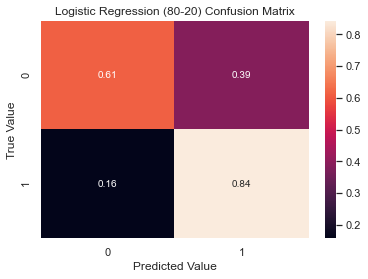

In [29]:
# Final Logistic Regression (80-20) Model
lr_8020 = LogisticRegression(solver='liblinear', C=0.0001)
lr_8020.fit(X_train_rus_8020, y_train_rus_8020)

# prediction
X_test_lr_8020 = scaler.transform(X_test_8020)
y_pred_lr_8020 = lr_8020.predict(X_test_lr_8020)

# classification report
print('Logistic Regression (80-20) Classification Report\n')
print(classification_report(y_test_8020, y_pred_lr_8020))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test_8020, y_pred_lr_8020, normalize='true'), annot=True, ax=ax)
ax.set_title('Logistic Regression (80-20) Confusion Matrix')
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')

plt.show()

Logistic Regression (70-30) Classification Report

              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1560
           1       0.44      0.85      0.58       553

    accuracy                           0.67      2113
   macro avg       0.68      0.73      0.66      2113
weighted avg       0.79      0.67      0.69      2113



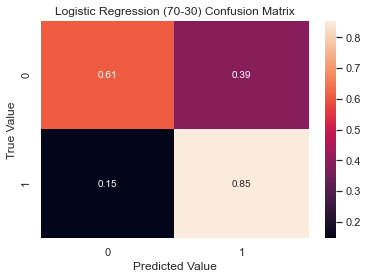

In [30]:
# Final Logistic Regression (70-30) Model
lr_7030 = LogisticRegression(solver='liblinear', C=0.0001)
lr_7030.fit(X_train_rus_7030, y_train_rus_7030)

# prediction
X_test_lr_7030 = scaler.transform(X_test_7030)
y_pred_lr_7030 = lr_7030.predict(X_test_lr_7030)

# classification report
print('Logistic Regression (70-30) Classification Report\n')
print(classification_report(y_test_7030, y_pred_lr_7030))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test_7030, y_pred_lr_7030, normalize='true'), annot=True, ax=ax)
ax.set_title('Logistic Regression (70-30) Confusion Matrix')
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')

plt.show()

Logistic Regression (60-40) Classification Report

              precision    recall  f1-score   support

           0       0.93      0.63      0.75      2071
           1       0.45      0.86      0.59       747

    accuracy                           0.69      2818
   macro avg       0.69      0.74      0.67      2818
weighted avg       0.80      0.69      0.71      2818



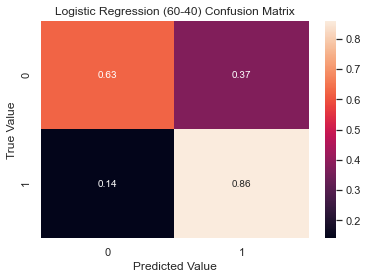

In [31]:
# Final Logistic Regression (60-40) Model
lr_6040 = LogisticRegression(solver='liblinear', C=0.0001)
lr_6040.fit(X_train_rus_6040, y_train_rus_6040)

# prediction
X_test_lr_6040 = scaler.transform(X_test_6040)
y_pred_lr_6040 = lr_6040.predict(X_test_lr_6040)

# classification report
print('Logistic Regression (60-40) Classification Report\n')
print(classification_report(y_test_6040, y_pred_lr_6040))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test_6040, y_pred_lr_6040, normalize='true'), annot=True, ax=ax)
ax.set_title('Logistic Regression (60-40) Confusion Matrix')
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')

plt.show()

### 5.1 Model Comparison and Evaluation

In [32]:
# Logistic Regression Models Performance Score

AUROC_8020 = np.round(roc_auc_score(y_test_8020, y_pred_lr_8020), 2)
AUCPR_8020 = np.round(average_precision_score(y_test_8020, y_pred_lr_8020), 2)
accuracy_8020 = np.round(accuracy_score(y_test_8020, y_pred_lr_8020), 2)
precision_8020 = np.round(precision_score(y_test_8020, y_pred_lr_8020), 2)
recall_8020 = np.round(recall_score(y_test_8020, y_pred_lr_8020), 2)
f1_score_8020 = np.round(f1_score(y_test_8020, y_pred_lr_8020), 2)

AUROC_7030 = np.round(roc_auc_score(y_test_7030, y_pred_lr_7030), 2)
AUCPR_7030 = np.round(average_precision_score(y_test_7030, y_pred_lr_7030), 2)
accuracy_7030 = np.round(accuracy_score(y_test_7030, y_pred_lr_7030), 2)
precision_7030 = np.round(precision_score(y_test_7030, y_pred_lr_7030), 2)
recall_7030 = np.round(recall_score(y_test_7030, y_pred_lr_7030), 2)
f1_score_7030 = np.round(f1_score(y_test_7030, y_pred_lr_7030), 2)

AUROC_6040 = np.round(roc_auc_score(y_test_6040, y_pred_lr_6040), 2)
AUCPR_6040 = np.round(average_precision_score(y_test_6040, y_pred_lr_6040), 2)
accuracy_6040 = np.round(accuracy_score(y_test_6040, y_pred_lr_6040), 2)
precision_6040 = np.round(precision_score(y_test_6040, y_pred_lr_6040), 2)
recall_6040 = np.round(recall_score(y_test_6040, y_pred_lr_6040), 2)
f1_score_6040 = np.round(f1_score(y_test_6040, y_pred_lr_6040), 2)

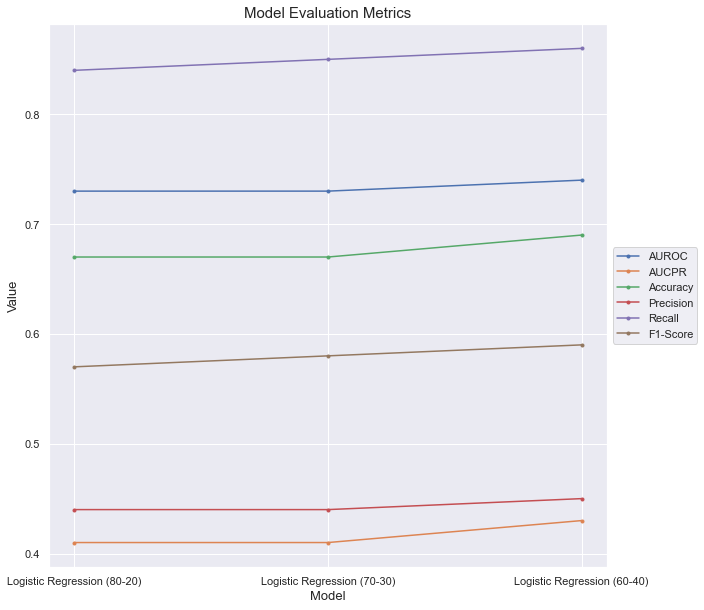

,AUROC,AUCPR,Accuracy,Precision,Recall,F1-Score
Logistic Regression (80-20),0.73,0.41,0.67,0.44,0.84,0.57
Logistic Regression (70-30),0.73,0.41,0.67,0.44,0.85,0.58
Logistic Regression (60-40),0.74,0.43,0.69,0.45,0.86,0.59


In [33]:
# Dataframe of final models' evaluation metrics 
df_final = pd.DataFrame(
    data=[
        {'AUROC':AUROC_8020, 'AUCPR':AUCPR_8020, 'Accuracy':accuracy_8020, 'Precision':precision_8020, 'Recall':recall_8020, 'F1-Score':f1_score_8020},
        {'AUROC':AUROC_7030, 'AUCPR':AUCPR_7030, 'Accuracy':accuracy_7030, 'Precision':precision_7030, 'Recall':recall_7030, 'F1-Score':f1_score_7030},
        {'AUROC':AUROC_6040, 'AUCPR':AUCPR_6040, 'Accuracy':accuracy_6040, 'Precision':precision_6040, 'Recall':recall_6040, 'F1-Score':f1_score_6040}
        ],
        index=[
            'Logistic Regression (80-20)',
            'Logistic Regression (70-30)',
            'Logistic Regression (60-40)'
        ])

# Plot metrics
plt.figure(figsize=(10, 10));
N = len(df_final.index)
ind = np.arange(N)
for model in list(df_final.columns):
    plt.plot(ind, df_final[model].values, linewidth=1.5, marker='.', label=model)
plt.xticks(
    ticks=np.arange(N),
    labels=['Logistic Regression (80-20)', 'Logistic Regression (70-30)', 'Logistic Regression (60-40)'])
plt.title('Model Evaluation Metrics', fontsize=15)
plt.ylabel('Value', fontsize=13)
plt.xlabel('Model', fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()


df_final

The best model chosen is the Logistic Regression (60-40) model with highest performance scores overall.

But most importantly, it has the highest recall score (following project objective).

In [34]:
# Export ML Performance Scores dataframe to csv file
df_final.to_csv('CustomerChurn_MLPerformance.csv')

The model performance & evaluation data frame is stored as a csv file so that it may be used for keeping.